# Density of non-coding genetic sequences within protein coding genes 
**for the different species for which we have records in both proteins and protein coding genes** 

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#
import sys
sys.path.append('../lib/')
import constants as c
import retrieve_data__functions as rd


# Initialize parameters
BOOL_QUALITY = "MERGED" # "MERGED" "ONLY_HIGH_QUALITY_GENOMES"               

BOOL_ALSO_THREE_DOMAIN_SYSTEM = 1

## The protein and protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# select the distributions for different species 
if (BOOL_QUALITY == "MERGED") or (BOOL_QUALITY == "ONLY_HIGH_QUALITY_GENOMES"):
    stat_file = c.STAT_MERGED_FILE
print("The statistical descriptions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
merged = pd.read_csv(stat_file, low_memory=False, sep="\t")
merged = merged[["genes_species", "merged_division_superregnum", "prots_superregnum", "tax_id", "prots_mean", "genes_mean"]] 
merged.rename(columns = {"genes_species": 'species',
                         "merged_division_superregnum": 'Group of organisms',
                         "prots_superregnum": "Three-domain system"}, inplace = True)

# visualize data
if 1:
    pd.set_option('display.max_columns', None)
    display(merged.head(1))
    print(merged.shape)
    print('\n', merged["Group of organisms"].value_counts(), sep="")

The statistical descriptions for the different species is in:
 /home/emuro/git/github/EM_geneLength_nature/main_work/../lib/../main_tables/stat_merged.tsv 



,species,Group of organisms,Three-domain system,tax_id,prots_mean,genes_mean
0,archangium_gephyra_gca_001027285,bacteria,bacteria,48,367.499703,1103.871035


(6519, 6)

Group of organisms
bacteria         5468
fungi             533
archaea           227
vertebrates        92
protists           91
plants             59
invertebrates      49
Name: count, dtype: int64


In [3]:
if BOOL_QUALITY == "ONLY_HIGH_QUALITY_GENOMES":
    species_hq__l = rd.from_species_list_retrieve_species_with_HQG(merged["species"].to_list())
    merged = merged[merged['species'].isin(species_hq__l)]
    # visualize data
    if 1:
        pd.set_option('display.max_columns', None)
        display(merged.head(1))
        print(merged.shape)
        print('\n', merged["Group of organisms"].value_counts(), sep="")

## Python functions

In [4]:
# FUNCTIONS
###########            
def plot__rho_within_genes(df2plot, col_x, col_y, x_lab, y_lab, title, legend): 
    # limits and tick-breaks
    x_limits = [400,200000] 
    y_limits = [-0.05, 1] 
    x_breaks = [400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
                20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 
                200000]
    
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.set_xscale('log', base=10)
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xticks(x_breaks)
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.set_title(title)
   
    ####colours = ['#D83B01', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']
    ###colours = c.OLD_COLOR_ORG_GROUPS

    palette_colors = c.OLD_COLOR_ORG_GROUPS
    if (legend =='Three-domain system'):
        palette_colors = c.COLOR_KINGDOMS  
    sns.scatterplot(data=df2plot, x=col_x, y=col_y, hue=legends_by, sizes=(2), alpha=.65, 
                    palette = palette_colors)

    X_plot = np.linspace(min(df2plot[col_x].to_list()), max(df2plot[col_x].to_list()), 5000)
    Y_plot = np.where(X_plot <= 1500, 0, (1 - 3 * 500/ X_plot))    
    plt.plot(X_plot, Y_plot, color='black', linewidth=3)
    
    plt.legend(loc='lower right', title=legend)
    plt.show()

## Density of non-coding genetic sequences within protein coding genes 

In [5]:
merged["rho"] = 1 - (3 * merged["prots_mean"] / merged["genes_mean"])
merged["theoretical"]  = np.where(merged["genes_mean"] <= 1500, 0, (1 - 3 * 500/ merged["genes_mean"]))

df2plot = merged
col_x = "genes_mean"
col_y = "rho"
the_title = "nCDS within protein coding genes"
x_lab = "Mean gene length (nt)"
y_lab = "Fraction of nCDS"

### Three-domain system

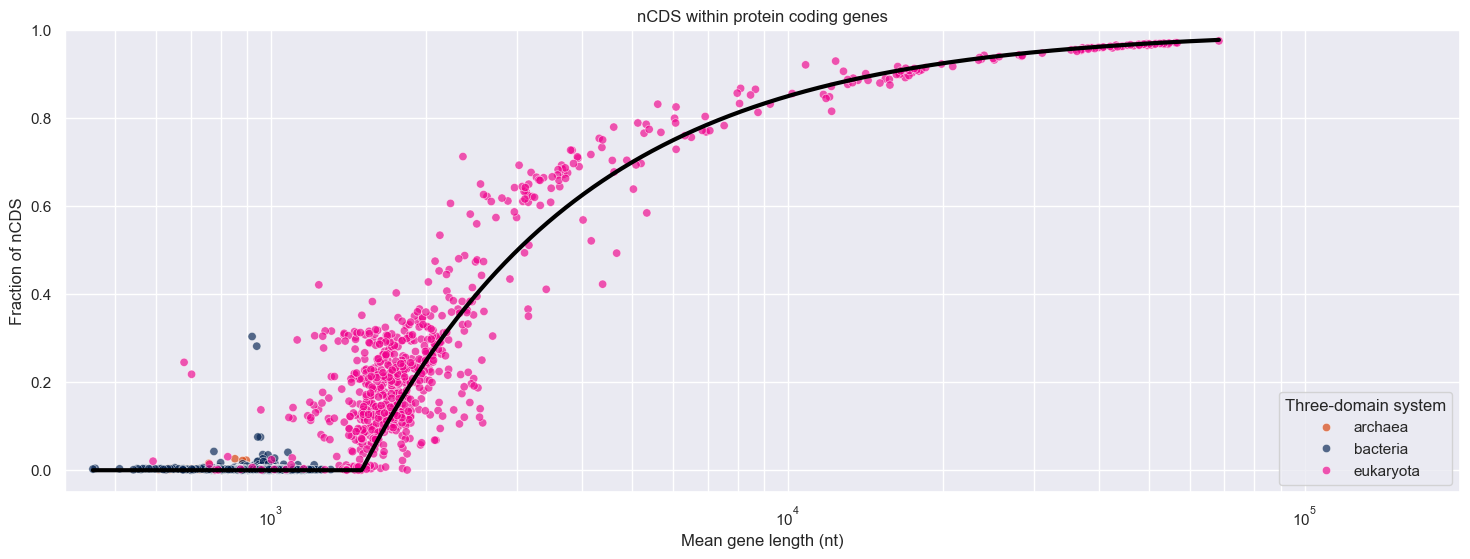

In [6]:
if BOOL_ALSO_THREE_DOMAIN_SYSTEM:
    legends_by = "Three-domain system"
    # Sort 
    df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                        categories=c.ORG_KINGDOMS,           
                                        ordered=True)
    df2plot.sort_values(legends_by, inplace=True)
    # plot
    plot__rho_within_genes(df2plot, col_x, col_y, x_lab, y_lab, the_title, legends_by)

**Figure caption:**   
Each point represents the density of nCDS for the mean protein coding gene for an species for which we have records in both proteins and protein coding genes. The theoretical line describes the trend observed in these data, going from a regime in which the average size of the proteins grows proportionally to the average size of the genes, to another in which the size of the protein stabilizes in comparation with the protein coding gene length.

### Group of organisms

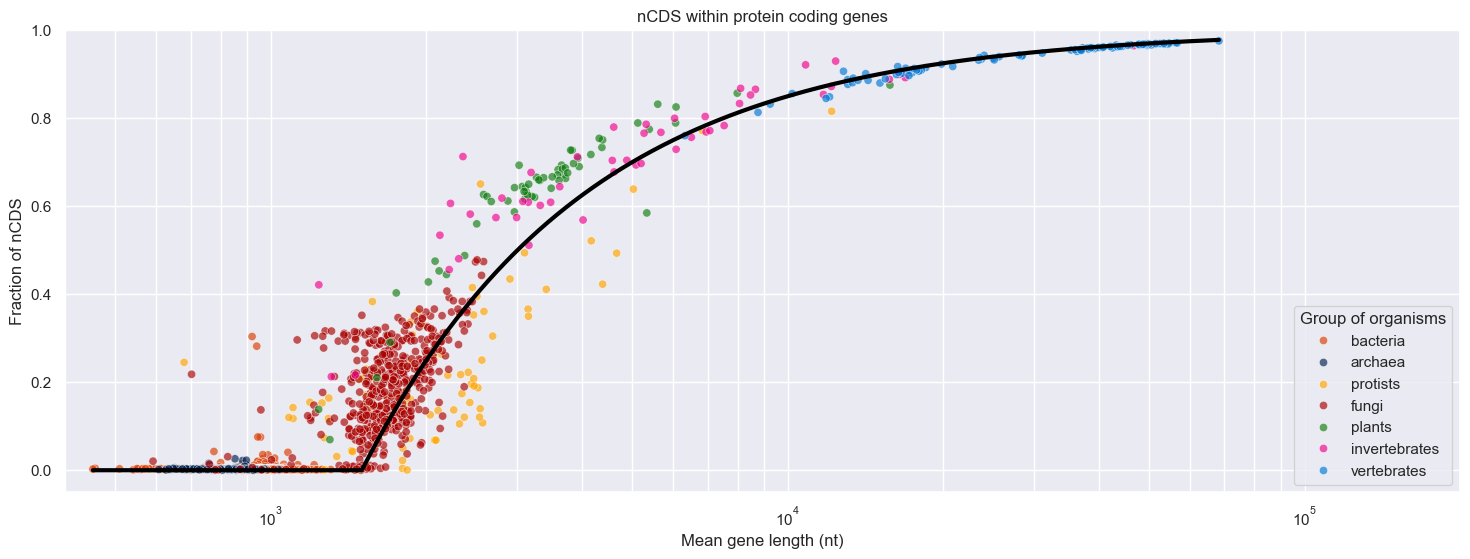

In [7]:
legends_by = "Group of organisms"
#
# Sort 
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                    categories=c.ORG_GROUPS,           
                                    ordered=True)
df2plot.sort_values(legends_by, inplace=True)

plot__rho_within_genes(df2plot, col_x, col_y, x_lab, y_lab, the_title, legends_by)